## Pima Indians - diabetes prediction
## Neural Network for binary classification

In [34]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import optimizers
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import zscore


# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

#Standardize the input Values
X = zscore(X)

# create model 
model = Sequential()
# Input layer (with dropout)
model.add(Dropout(0.3,input_shape=(8,)))
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Save model to disk ############
# Save model structure as json
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
model.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')
#################################    
    
# Set up checkpointing

filepath = 'weights.best.h5' #The name of the file the weights will be stored in
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max') #Creating the actual check points and paramters for it
callbacks_list = [checkpoint] #A list of call backs

#Fit the model to the data with proper call backs and epochs
history=model.fit(X,Y,validation_split=0.3,epochs=1000,verbose=0,callbacks=callbacks_list)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Saved model to disk


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


768/768 [==============================] - 0s 23us/step

accuracy: 80.86%
Confusion Matrix
True negatives:  445
False negatives:  92
False positives:  55
True positives:  176


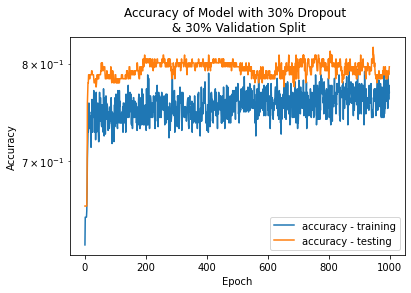

In [37]:
import matplotlib.pyplot as plt
accuracy_training = history.history['accuracy'] #Accuracy of the training data
loss = history.history['loss'] #Loss value of the model
accuracy_testing = history.history['val_accuracy'] #Variable for validation data accuracy
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training') 
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' ) #X label
plt.ylabel('Accuracy') #Y label
plt.legend() 
plt.title('Accuracy of Model with 30% Dropout \n & 30% Validation Split')
plt.savefig('30% acc') #saves image
#plt.grid()
plt.show() #shows graph

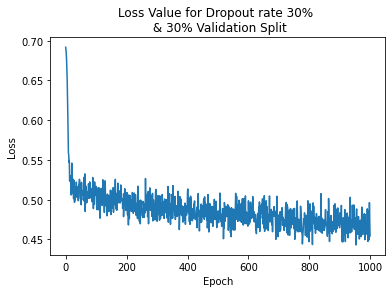

In [38]:
plt.plot(loss)
plt.xlabel('Epoch' )
plt.ylabel('Loss')
plt.title('Loss Value for Dropout rate 30% \n & 30% Validation Split')
plt.savefig('30% loss')
#plt.grid()
plt.show()

In [0]:
#This is to load out the saved weights model 
from tensorflow.keras.models import load_model
model2 = load_model(os.path.join(save_path,"weights.best.h5"))
pred = model2.predict(x)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"After load score (RMSE): {score}")